# Data Analysis Project

In [80]:
#For data analysis manipulation
import pandas as pd
#For data analysis manipulation
import numpy as np
#To visually plot and describe data
import matplotlib.pyplot as plt
#To visually plot and describe data
import seaborn as sns
#To create logistic regression model that will create model informing what are the most important variables.
import statsmodels.api as sm
#To plot visualizations inline with the Jupyter Notebook.
%matplotlib inline

In [15]:
#Set the column width so I would be able to see the whole data dictionary for the code I was outputting
pd.set_option('display.max_colwidth',500)

# read in the data dictionary
df_dict = pd.read_csv("wine_data_dictionary.csv")
df_dict.head(20)

,data column,description
0,country,The country that the wine is from
1,description,A few sentences from a sommelier describing the wine's taste smell look feel etc.
2,designation,The vineyard within the winery where the grapes that made the wine are from
3,points,The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
4,price,The cost for a bottle of the wine
5,province,The province or state that the wine is from
6,region_1,The wine growing area in a province or state (ie Napa)
7,region_2,Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley) but this value can sometimes be blank
8,taster_name,Name of the person who tasted and reviewed the wine
9,taster_twitter_handle,Twitter handle for the person who tasted and reviewed the wine


# Exploratory Analysis

This section explores the data that was provided.

In [17]:
#reset the column size so it can be smaller
pd.set_option('display.max_colwidth',100)

#read in the data from the wine magazine
df = pd.read_csv("winemag_data_pandata.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressi...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled o...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opu...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rus...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks


In [14]:
#check the data for the different types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [5]:
#describe the continous data present
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,33.860897
std,37519.540256,3.039730,42.270937
min,0.000000,80.000000,-24.000000
25%,32492.500000,86.000000,16.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [23]:
#group the data by countries so I can identify what had more than 1000 reviews
dfgrouped = df.groupby(['country']).count()
dfgrouped.head()

,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,,
Argentina,3800,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
Armenia,2,2,2,2,2,2,0,0,2,2,2,2,2
Australia,2329,2329,1640,2329,2294,2329,2327,0,2037,2037,2329,2329,2329
Austria,3345,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345
Bosnia and Herzegovina,2,2,1,2,2,2,0,0,2,1,2,2,2


In [27]:
#create dataset with countries that have more than 1000 reviews
at1000=dfgrouped['description']>1000

In [32]:
#make this the new dataset
df_1000 = dfgrouped[at1000]

In [33]:
#shape the dataset
df_1000.shape

(12, 13)

In [34]:
#show the new dataset
df_1000.head(13)

,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,,
Argentina,3800,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
Australia,2329,2329,1640,2329,2294,2329,2327,0,2037,2037,2329,2329,2329
Austria,3345,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345
Chile,4472,4472,3879,4472,4416,4472,0,0,4361,4361,4472,4471,4472
France,22093,22093,14530,22093,17776,22093,22017,0,21828,21828,22093,22093,22093
Germany,2165,2165,2006,2165,2120,2165,0,0,2134,375,2165,2165,2165
Italy,19540,19540,13889,19540,16914,19540,19513,0,11042,11042,19540,19540,19540
New Zealand,1419,1419,684,1419,1378,1419,0,0,1311,1311,1419,1419,1419
Portugal,5691,5691,5105,5691,4875,5691,0,0,5686,5686,5691,5691,5691


In [35]:
#reset the index to bring the country back into the df not as an index
df_1000.reset_index(level=0, inplace=True)
df_1000.head()

,country,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Argentina,3800,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
1,Australia,2329,2329,1640,2329,2294,2329,2327,0,2037,2037,2329,2329,2329
2,Austria,3345,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345
3,Chile,4472,4472,3879,4472,4416,4472,0,0,4361,4361,4472,4471,4472
4,France,22093,22093,14530,22093,17776,22093,22017,0,21828,21828,22093,22093,22093


In [38]:
#see the unique list of the countries with more than 1000 reviews
country_array = df_1000['country'].unique()
print(country_array)

['Argentina' 'Australia' 'Austria' 'Chile' 'France' 'Germany' 'Italy'
 'New Zealand' 'Portugal' 'South Africa' 'Spain' 'US']


In [41]:
#return the countries that have values equal to one of them in the country list
plot_df = df.loc[df['country'].isin(country_array)]
plot_df['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand'], dtype=object)

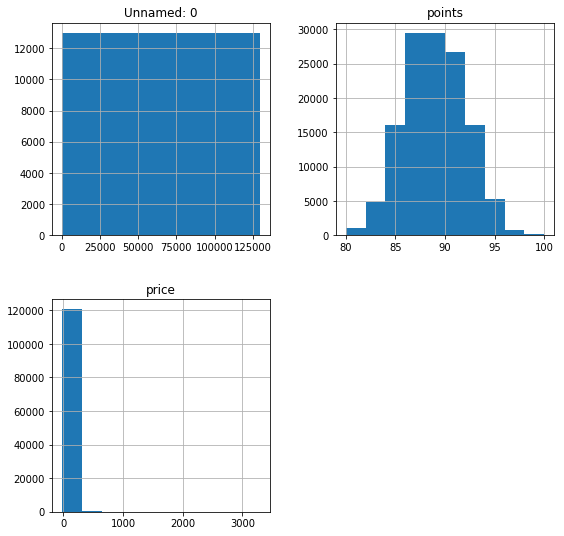

In [42]:
#plot histograms for the data
df.hist(figsize=(9,9));

In [58]:
#create function that will create unique colors for the countries in the scatter plot
def color(row):
    if row['country'] == 'Italy'  :
        return 'blue'
    elif row['country'] == 'Portugal' :
        return 'green'
    elif row['country'] == 'US' :
        return 'red'
    elif row['country'] == 'Spain' :
        return 'yellow'
    elif row['country'] == 'France' :
        return 'black'
    elif row['country'] == 'Germany' :
        return 'silver'
    elif row['country'] == 'Argentina' :
        return 'pink'
    elif row['country'] == 'Chile' :
        return 'purple'
    elif row['country'] == 'Australia' :
        return 'brown'
    elif row['country'] == 'Austria' :
        return 'violet'
    elif row['country'] == 'South Africa' :
        return 'orange'
    else:
      return 'teal'

In [69]:
#create a grouped dataset with the sum of points and price by country
scatter_df = plot_df.groupby(['country']).sum()
scatter_df.reset_index(level=0, inplace=True)

In [70]:
#Apply the function to df to create the new column.
scatter_df['color'] = scatter_df.apply(lambda row: color(row), axis=1)

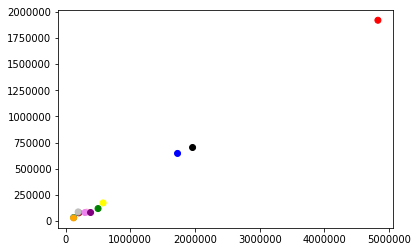

In [78]:
#plot the scatter plot on the jupyer notebook

fig, ax = plt.subplots()

ax.scatter(scatter_df['points'], scatter_df['price'],c=scatter_df['color'])

plt.show()

# Model 1

This model takes the price column to calculate the points.

In [99]:
## Without a constant
#drop all nulls since the model will not run without it
df_model = df.dropna()
X = df_model['price']
y = df_model['points']

In [90]:
#Model 1.1
# create the model and fit the results
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                 4.147e+04
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:10:40   Log-Likelihood:            -1.2067e+05
No. Observations:               22387   AIC:                         2.413e+05
Df Residuals:                   22386   BIC:                         2.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.4206      0.007    203.645      0.000       1.407       1.434
==============================================================================
Omnibus:                    44582.255   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        722041416.194
Skew:                         -15.406   Prob(JB):                         0.00
Kurtosis:                     882.270   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#Model 1.2
# create the model and fit the results

X = df_model['price']
y = df_model['points']
X = sm.add_constant(X)
# Add the constant

# create the model and fit the results
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:12:02   Log-Likelihood:                -52978.
No. Observations:               22387   AIC:                         1.060e+05
Df Residuals:                   22385   BIC:                         1.060e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.0600      0.029   3072.948      0.000      88.004      88.116
price          0.0364      0.001     64.558      0.000       0.035       0.038
==============================================================================
Omnibus:                     9736.386   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           583855.387
Skew:                          -1.286   Prob(JB):                         0.00
Kurtosis:                      27.886   Cond. No.                         84.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2

This model takes the log of the price column to calculate the points.

In [105]:
df_model['log_price'] = np.log(df_model['price'])
df_log_model = df_model.dropna()
#take the log of the price column and then drop any null values that resulted from that transformation

C:\Users\kylec\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\kylec\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
#Model 2.1
# create the model and fit the results
X = df_log_model['price']
y = df_log_model['points']

model = sm.OLS(y, X)
results = model.fit()

predictions = results.predict(X) # make the predictions by the model

# Print out the statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 4.663e+04
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:21:23   Log-Likelihood:            -1.1673e+05
No. Observations:               21846   AIC:                         2.335e+05
Df Residuals:                   21845   BIC:                         2.335e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.4401      0.007    215.949      0.000       1.427       1.453
==============================================================================
Omnibus:                    46088.493   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        978838082.004
Skew:                         -17.631   Prob(JB):                         0.00
Kurtosis:                    1039.392   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
#Model 2.2
X = df_log_model['price']
y = df_log_model['points']
X = sm.add_constant(X)
# Add the constant

# create the model and fit the results
model = sm.OLS(y, X)
results = model.fit()

predictions = results.predict(X) # make the predictions by the model

# Print out the statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3906.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:21:52   Log-Likelihood:                -51710.
No. Observations:               21846   AIC:                         1.034e+05
Df Residuals:                   21844   BIC:                         1.034e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.0281      0.030   2895.258      0.000      87.969      88.088
price          0.0370      0.001     62.500      0.000       0.036       0.038
==============================================================================
Omnibus:                     9986.212   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           679359.554
Skew:                          -1.361   Prob(JB):                         0.00
Kurtosis:                      30.183   Cond. No.                         89.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

Model 2.1 is better than Models 2.2, 1.2, and 1.1 for the following reasons:
* Models 1.2 and 2.2 had very low predictive values (see R-squared) and were not very accurately predictive of points.
* Model 2.1 had a better R-squared than the Model 1.1 and is therefore better able to predict the outcome for points.
* Though Model 1.1 had more observations, Model 2.1 still had a significant number of observations to make its more accurate readings better than Model 1.1's more observations listed.